In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bert-benchmark/__resultx__.html
/kaggle/input/bert-benchmark/custom.css
/kaggle/input/bert-benchmark/__notebook__.ipynb
/kaggle/input/bert-benchmark/__results__.html
/kaggle/input/bert-benchmark/__output__.json
/kaggle/input/bert-benchmark/submission.csv
/kaggle/input/bert-benchmark/__results___files/__results___28_1.png
/kaggle/input/bert-benchmark/bert_base_uncased/vocab.txt
/kaggle/input/bert-benchmark/bert_base_uncased/special_tokens_map.json
/kaggle/input/bert-benchmark/bert_base_uncased/tokenizer_config.json
/kaggle/input/xlm-roberta-pseudo-labeling/custom.css
/kaggle/input/xlm-roberta-pseudo-labeling/__notebook__.ipynb
/kaggle/input/xlm-roberta-pseudo-labeling/__results__.html
/kaggle/input/xlm-roberta-pseudo-labeling/__output__.json
/kaggle/input/xlm-roberta-pseudo-labeling/submission.csv
/kaggle/input/distilbert-baseline/__resultx__.html
/kaggle/input/distilbert-baseline/custom.css
/kaggle/input/distilbert-baseline/__notebook__.ipynb
/kaggle/input/distilbert-base

In [2]:
sub = pd.read_csv('/kaggle/input/jigsaw-multilingual-toxic-comment-classification/sample_submission.csv')
sub0 = pd.read_csv('../input/jigsaw/submission_ensemble25.csv')
sub1 = pd.read_csv('../input/jigsaw/submission_sl23.csv')
sub2 = pd.read_csv('../input/jigsaw/submission_bert13.csv')
sub3 = pd.read_csv('../input/jigsaw/submission_distillbert11.csv')
test = pd.read_csv('../input/jigsaw-multilingual-toxic-comment-classification/test.csv')

In [3]:
from scipy.special import softmax

#pb = np.array([0.9455,0.9443,0.9270,0.8794])
#"""Weighted by sofmax of 1 over 1 minus pb score."""
#weight = lambda x: softmax(1/(1-x))
#w = weight(pb)
w = [0.45, 0.25, 0.1, 0.05]
print([round(i, 2) for i in w])

[0.45, 0.25, 0.1, 0.05]


In [4]:
sub['toxic'] = sub0['toxic']*w[0] + sub1['toxic']*w[1] + sub2['toxic']*w[2] + sub3['toxic']*w[3]

In [5]:
sub.loc[test["lang"] == "es", "toxic"] *= 1.11
#sub.loc[test["lang"] == "fr", "toxic"] *= 0.99
#sub.loc[test["lang"] == "it", "toxic"] *= 0.98
sub.loc[test["lang"] == "pt", "toxic"] *= 0.94
sub.loc[test["lang"] == "tr", "toxic"] *= 1.17

sub.toxic -= sub.toxic.min()
sub.toxic /= (sub.toxic.max() - sub.toxic.min())

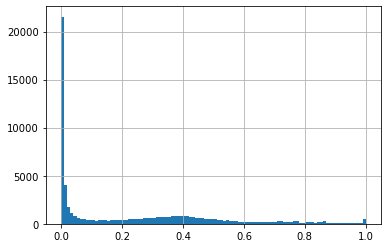

In [6]:
sub.toxic.hist(bins=100, log=False, alpha=1)

In [7]:
sub.to_csv('submission.csv', index=False)